In [40]:
import pandas as pd
from mplsoccer import Pitch, FontManager
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patheffects as path_effects
fm = FontManager()
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]
from matplotlib.font_manager import FontProperties
from matplotlib.offsetbox import bbox_artist

In [2]:
df = pd.read_csv('archivos/premierEventos15-16.csv')

<ipython-input-2-276eba623610>:1: DtypeWarning: Columns (10,12,17,18,19,20,23,28,37,45,46,52,73,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archivos/premierEventos15-16.csv')


In [3]:
df_mini =df.head(20)

In [4]:
df.type.value_counts()

type
Pass                 368619
Ball Receipt*        340324
Carry                276949
Pressure             115402
Ball Recovery         40943
Duel                  32290
Clearance             21645
Block                 14839
Dribble               13721
Goal Keeper           11777
Miscontrol            10786
Dispossessed          10520
Shot                   9908
Foul Committed         9512
Foul Won               9112
Interception           8920
Dribbled Past          8771
Substitution           2109
Half Start             1520
Half End               1520
Injury Stoppage        1032
Starting XI             760
Tactical Shift          625
50/50                   559
Shield                  503
Referee Ball-Drop       272
Bad Behaviour           193
Error                   178
Player Off              145
Player On               144
Offside                 109
Own Goal Against         38
Own Goal For             38
Name: count, dtype: int64

In [5]:
pases = df[df['type'] == 'Pass']
pases.pass_type.value_counts()

pass_type
Recovery        39385
Throw-in        17559
Free Kick        9150
Goal Kick        6341
Corner           4107
Interception     3272
Kick Off         1777
Name: count, dtype: int64

In [7]:
saques_arco = pases[pases['pass_type'] == 'Goal Kick']
saques_arco.head()

,Unnamed: 0,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,block_save_block,shot_deflected,player_off_permanent,goalkeeper_success_in_play,shot_follows_dribble,goalkeeper_lost_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post
130,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
saques_arco[['team', 'pass_end_location']]

,team,pass_end_location
130,AFC Bournemouth,"[26.6, 13.6]"
172,Leicester City,"[97.4, 54.1]"
216,AFC Bournemouth,"[12.9, 29.0]"
341,AFC Bournemouth,"[74.9, 26.5]"
416,Leicester City,"[88.4, 56.2]"
...,...,...
1310711,Swansea City,"[14.4, 47.6]"
1310936,Chelsea,"[63.1, 79.7]"
1311024,Swansea City,"[84.4, 51.2]"
1311100,Swansea City,"[35.7, 26.3]"


In [9]:
saques_arco[['end_x', 'end_y']] = saques_arco['pass_end_location'].str.strip('[').str.strip(']').str.split(',').apply(pd.Series)
saques_arco[['end_x', 'end_y']] = saques_arco[['end_x', 'end_y']].astype(float)

<ipython-input-9-16a6f53006de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saques_arco[['end_x', 'end_y']] = saques_arco['pass_end_location'].str.strip('[').str.strip(']').str.split(',').apply(pd.Series)
<ipython-input-9-16a6f53006de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saques_arco[['end_x', 'end_y']] = saques_arco['pass_end_location'].str.strip('[').str.strip(']').str.split(',').apply(pd.Series)
<ipython-input-9-16a6f53006de>:2: SettingWithCopyWarning: 
A value is trying to be set on a co

In [11]:
saques_arco = saques_arco[['team', 'end_x', 'end_y']].reset_index(drop=True)

In [12]:
saques_arco

,team,end_x,end_y
0,AFC Bournemouth,26.6,13.6
1,Leicester City,97.4,54.1
2,AFC Bournemouth,12.9,29.0
3,AFC Bournemouth,74.9,26.5
4,Leicester City,88.4,56.2
...,...,...,...
6336,Swansea City,14.4,47.6
6337,Chelsea,63.1,79.7
6338,Swansea City,84.4,51.2
6339,Swansea City,35.7,26.3


In [13]:
zone_areas = {
    'zone_1':{
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
        'x_lower_bound': 83, 'x_upper_bound': 100,
    },
    'zone_2':{
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
        'x_lower_bound': 83, 'x_upper_bound': 100,
    },
    'zone_3':{
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
    },
    'zone_4':{
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
    },
    'zone_5':{
        'y_lower_bound': 21.1, 'y_upper_bound': 36.8,
        'x_lower_bound': 83, 'x_upper_bound': 100,
    },
    'zone_6':{
        'y_lower_bound': 63.2, 'y_upper_bound': 78.9,
        'x_lower_bound': 83, 'x_upper_bound': 100,
    },
    'zone_7':{
        'y_lower_bound': 36.8, 'y_upper_bound': 63.2,
        'x_lower_bound': 83, 'x_upper_bound': 100,
    },
    'zone_8':{
        'y_lower_bound': 36.8, 'y_upper_bound': 63.2,
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
    },
    'zone_9':{
        'y_lower_bound': 21.1, 'y_upper_bound': 36.8,
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
    },
    'zone_10':{
        'y_lower_bound': 63.2, 'y_upper_bound': 78.9,
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
    },
    'zone_11':{
        'y_lower_bound': 36.8, 'y_upper_bound': 63.2,
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
    },
    'zone_12':{
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
    },
    'zone_13':{
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
    },
    'zone_14':{
        'y_lower_bound': 21.1, 'y_upper_bound': 36.8,
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
    },
    'zone_15':{
        'y_lower_bound': 36.8, 'y_upper_bound': 63.2,
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
    },
    'zone_16':{
        'y_lower_bound': 63.2, 'y_upper_bound': 78.9,
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
    },
    'zone_17':{
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
    },
    'zone_18':{
        'y_lower_bound': 21.1, 'y_upper_bound': 36.8,
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
    },
    'zone_19':{
        'y_lower_bound': 36.8, 'y_upper_bound': 63.2,
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
    },
    'zone_20':{
        'y_lower_bound': 63.2, 'y_upper_bound': 78.9,
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
    },
    'zone_21':{
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
    },
    'zone_22':{
        'y_lower_bound': 0, 'y_upper_bound': 100,
        'x_lower_bound': 0, 'x_upper_bound': 33.5,
    }
}

In [14]:
def assign_shot_zone(x,y):
    '''
    This function returns the zone based on the x & y coordinates of the shot
    taken.
    Args:
        - x (float): the x position of the shot based on a vertical grid.
        - y (float): the y position of the shot based on a vertical grid.
    '''

    global zone_areas

    # Conditions

    for zone in zone_areas:
        if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
            if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
                return zone

In [15]:
assign_shot_zone(90,90)

'zone_1'

In [16]:
saques_arco['end_x'] = saques_arco['end_x'] * .8
saques_arco['end_y'] = saques_arco['end_y'] * 1.2

In [20]:
saques_arco['zone_area'] = [assign_shot_zone(x,y) for x,y in zip(saques_arco['end_x'], saques_arco['end_y'])]
saques_arco

,team,end_x,end_y,zone_area
0,AFC Bournemouth,21.28,16.32,zone_22
1,Leicester City,77.92,64.92,zone_10
2,AFC Bournemouth,10.32,34.80,zone_22
3,AFC Bournemouth,59.92,31.80,zone_14
4,Leicester City,70.72,67.44,zone_10
...,...,...,...,...
6336,Swansea City,11.52,57.12,zone_22
6337,Chelsea,50.48,95.64,zone_12
6338,Swansea City,67.52,61.44,zone_8
6339,Swansea City,28.56,31.56,zone_22


In [25]:
data = saques_arco.groupby(['team', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()
data.rename(columns={0:'count'}, inplace=True)

In [33]:
total = data.groupby('team')['count'].sum().reset_index()
total.rename(columns={'count':'total'}, inplace=True)

In [36]:
df_plot = pd.merge(data, total, on='team')
df_plot['pct_goal_kicks'] = df_plot['count'] / df_plot['total']
df_plot

,team,zone_area,count,total,pct_goal_kicks
0,AFC Bournemouth,zone_10,5,299,0.016722
1,AFC Bournemouth,zone_12,16,299,0.053512
2,AFC Bournemouth,zone_13,25,299,0.083612
3,AFC Bournemouth,zone_14,32,299,0.107023
4,AFC Bournemouth,zone_15,31,299,0.103679
...,...,...,...,...,...
336,West Ham United,zone_22,64,336,0.190476
337,West Ham United,zone_3,6,336,0.017857
338,West Ham United,zone_4,4,336,0.011905
339,West Ham United,zone_8,9,336,0.026786


In [38]:
lista_eq = list(df_plot.team.unique())

In [39]:
lista_eq

['AFC Bournemouth',
 'Arsenal',
 'Aston Villa',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Norwich City',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United']

Text(0.03, 0.899, 'Zonas y porcentajes sobre donde terminaron los saques de arco de los equipos. Premier League 15/16')

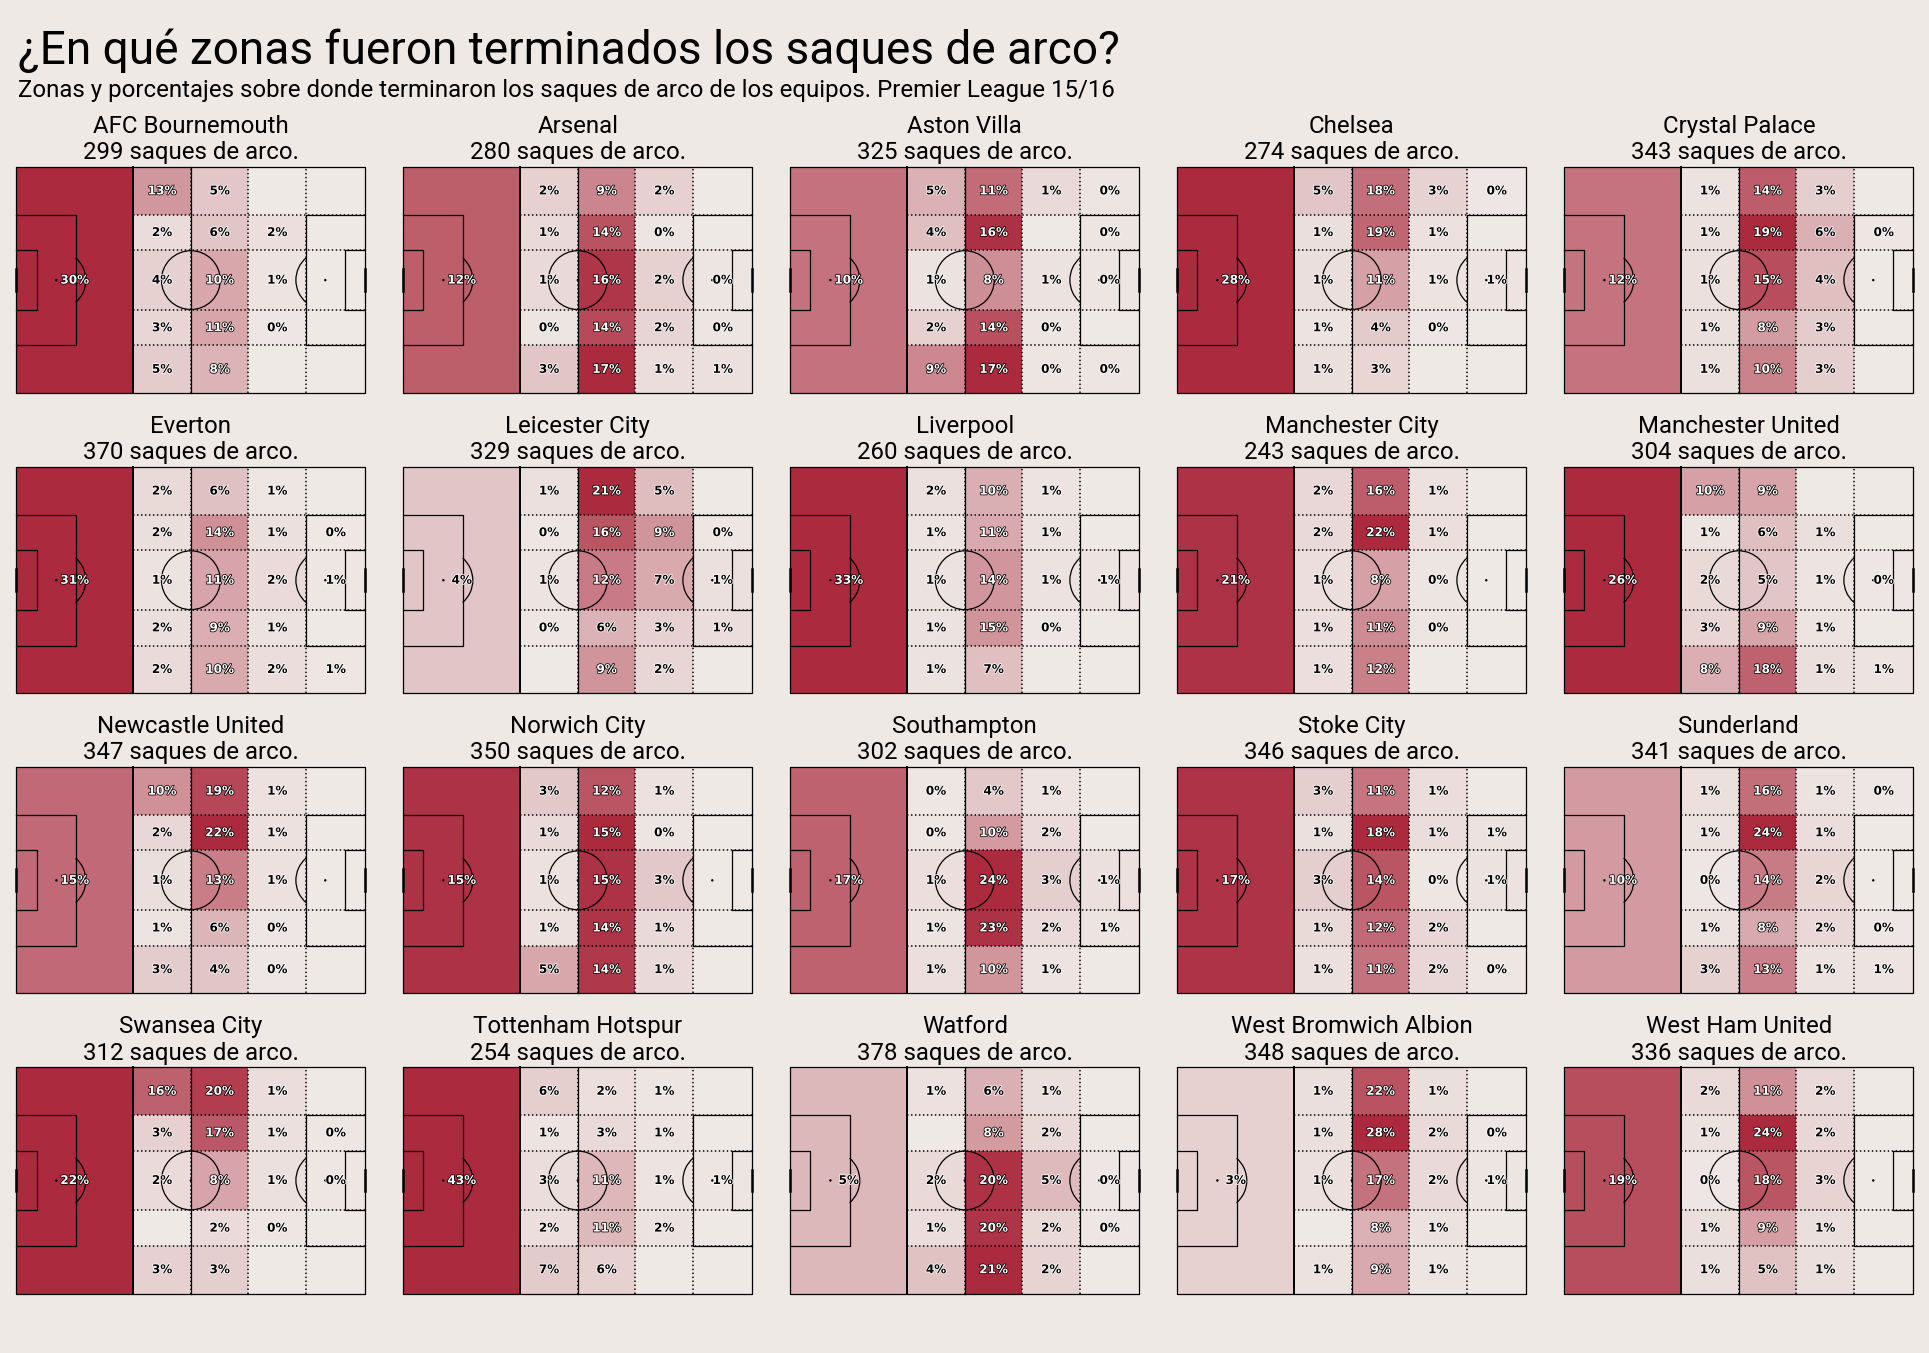

In [57]:
pitch = Pitch(line_zorder=2, line_color='black', pad_top=20, pitch_type='opta', linewidth=1.25)

GRID_HEIGHT = 0.82
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=4, ncols=5, figheight=20,
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
facecolor = "#EFE9E6"
fig.set_facecolor(facecolor)

for i, ax in enumerate(axs['pitch'].flat[:len(lista_eq)]):
    ax.set_facecolor(facecolor)
    ax.plot([33.5, 33.5], [0, 100], ls='-', lw=2,color='black')
    ax.plot([50, 50], [0, 100], ls=':', color='black')
    ax.plot([66.5, 66.5], [0, 100], ls=':', color='black')
    ax.plot([83, 83], [0, 100], ls=':', color='black')
    
    ax.plot([33.5, 100], [21.1,21.1], ls=':', color='black')
    ax.plot([33.5, 100], [36.8,36.8], ls=':', color='black')
    ax.plot([33.5, 100], [63.2,63.2], ls=':', color='black')
    ax.plot([33.5, 100], [78.9,78.9], ls=':', color='black')

    plot_df = df_plot[df_plot['team'] == lista_eq[i]]
    max_value = plot_df['pct_goal_kicks'].max()
    
    for zone in plot_df['zone_area']:
        shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_goal_kicks'].iloc[0]
        x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
        y1 = zone_areas[zone]['y_lower_bound']
        y2 = zone_areas[zone]['y_upper_bound']
        ax.fill_between(
            x=x_lim, 
            y1=y1, y2=y2, 
            color='#ab2a3e', alpha=(shot_pct/max_value),
            zorder=0, ec='None')
        if shot_pct > 0.075:
                color_text = 'white'
                fore_color ='black'
        else:
                color_text = 'black'
                fore_color = 'white'
        if shot_pct >= 0:
            x_pos = x_lim[0] + abs(x_lim[0] - x_lim[1])/2
            y_pos = y1 + abs(y1 - y2)/2
            text_ = ax.annotate(
                xy=(x_pos, y_pos),
                text=f'{shot_pct:.0%}',
                ha='center',
                va='center',
                color=color_text,
                weight='bold',
                size=12
            )
            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground=fore_color), path_effects.Normal()]
            )
    
    ax.text(50, 112.5, f"{lista_eq[i]}\n{df_plot[df_plot['team'] == lista_eq[i]]['total'].values[0]} saques de arco.",
            ha='center', va='center', fontsize=24,
            fontproperties=fm.prop)
    
    # -- Transformation functions
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take df_plot coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((12,101))
    ax_size = 0.1

fig.text(
    x=0.03, y=.919,
    s='¿En qué zonas fueron terminados los saques de arco?',
    ha='left',
    va='bottom',
    size=46,
    fontproperties = fm.prop
)
fig.text(
    x=0.03, y=.899,
    s='Zonas y porcentajes sobre donde terminaron los saques de arco de los equipos. Premier League 15/16',
    ha='left',
    va='bottom',
    weight='bold',
    size=24,
    fontproperties = fm.prop
)

plt.savefig('imagen.png', dpi=300, bbox_inches='tight')

In [51]:
enumerate(axs['pitch'].flat[:len(lista_eq)])